In [5]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy.optimize import curve_fit
import os


Гистограмма с нормальным распределением


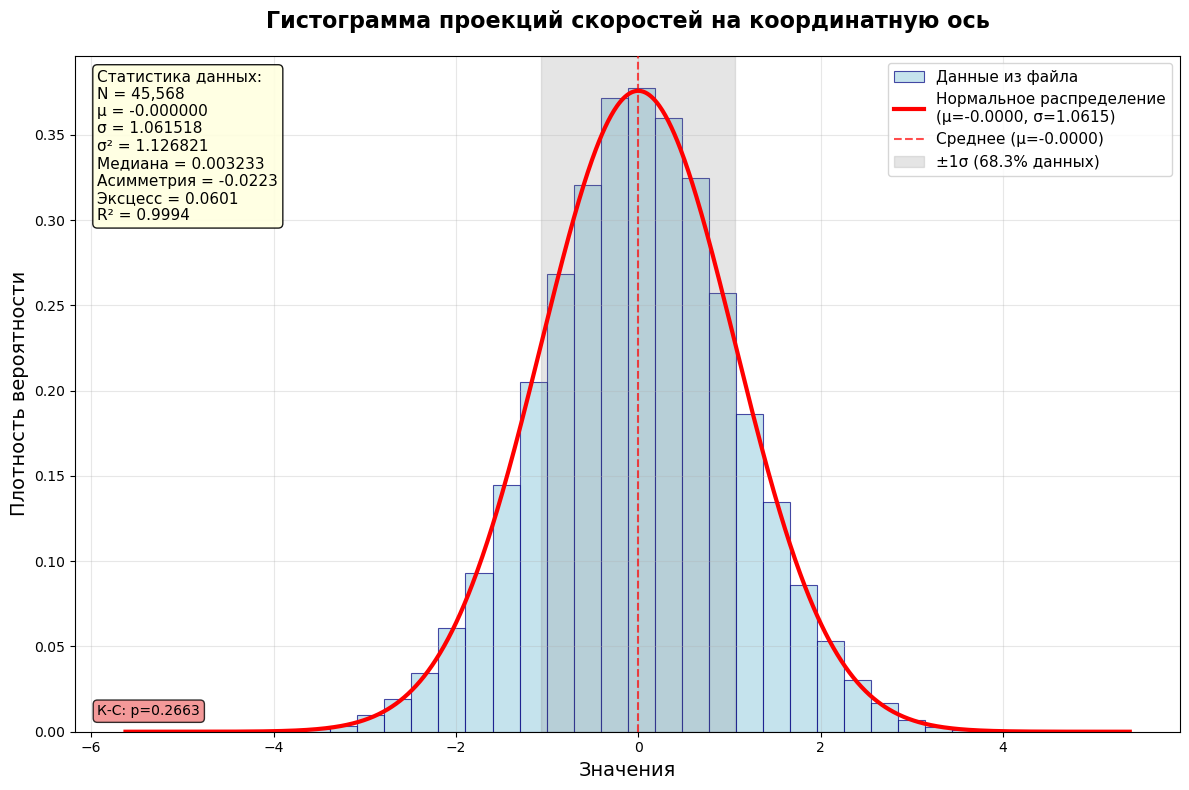


ДЕТАЛЬНЫЙ СТАТИСТИЧЕСКИЙ АНАЛИЗ: C:\NormanProject\Molecular_Dynamics_project\velocity_coord.txt
Объем выборки (N): 45,568
Математическое ожидание (μ): -0.00000000
Дисперсия (σ²): 1.12682084
Стандартное отклонение (σ): 1.06151818
Медиана: 0.00323276
Минимум: -4.56259000
Максимум: 4.33003000
Размах: 8.89262000
Коэффициент вариации: -23768397335.8676%
Асимметрия: -0.022329
Эксцесс: 0.060101
Коэффициент детерминации R²: 0.999417
Интерпретация R²: Отличное соответствие нормальному распределению

ТЕСТЫ НОРМАЛЬНОСТИ:
Тест Колмогорова-Смирнова: D = 0.004697, p = 0.266276
✓ Данные не противоречат нормальному распределению (p > 0.05)
Показать QQ-plot для проверки нормальности? (y/n): y


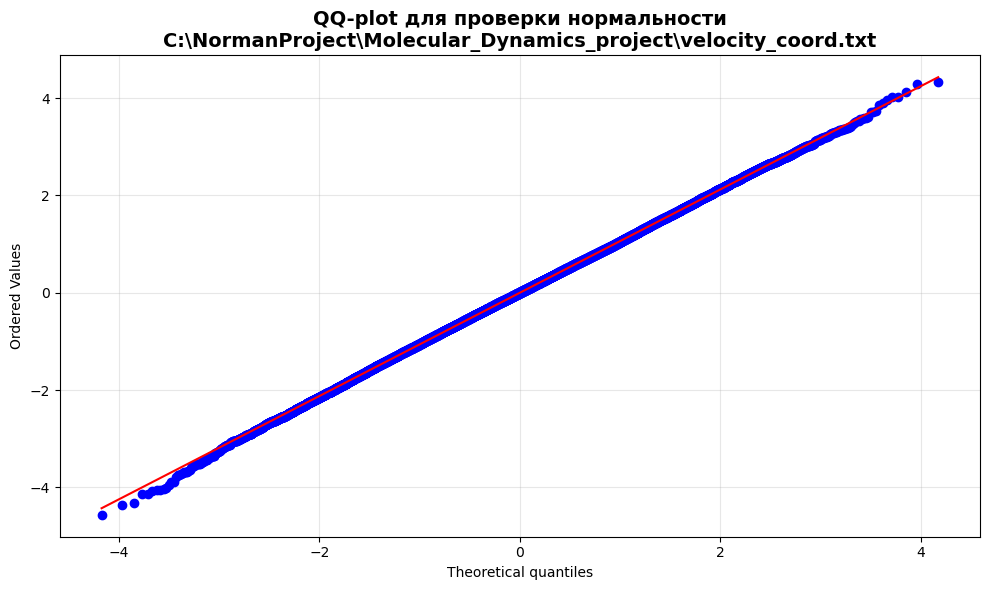

In [7]:
def create_histogram_with_normal(filename, bins=30):
    """
    Создает гистограмму с наложенным нормальным распределением
    """
    # Проверка существования файла
    if not os.path.exists(filename):
        print(f"Ошибка: Файл '{filename}' не найден.")
        return
    
    # Чтение данных
    data = []
    with open(filename, 'r', encoding='utf-8') as file:
        for line_num, line in enumerate(file, 1):
            line = line.strip()
            if line:
                try:
                    value = float(line)
                    data.append(value)
                except ValueError:
                    print(f"Предупреждение: Строка {line_num} содержит некорректные данные: '{line}'")
    
    if not data:
        print("Ошибка: Не найдено корректных числовых данных.")
        return
    
    data = np.array(data)
    
    # Статистика данных
    mean_val = np.mean(data)
    std_val = np.std(data)
    var_val = np.var(data)
    median_val = np.median(data)
    
    # Создание гистограммы
    plt.figure(figsize=(12, 8))
    
    # Гистограмма данных (нормализованная)
    n, bins, patches = plt.hist(data, bins=bins, density=True, 
                               alpha=0.7, color='lightblue', 
                               edgecolor='navy', linewidth=0.8,
                               label='Данные из файла',
                               zorder=1)
    
    # Нормальное распределение с параметрами из данных
    x_smooth = np.linspace(min(data) - std_val, max(data) + std_val, 1000)
    normal_fit = stats.norm.pdf(x_smooth, mean_val, std_val)
    
    # Наложение нормального распределения
    plt.plot(x_smooth, normal_fit, 'r-', linewidth=3, 
            label=f'Нормальное распределение\n(μ={mean_val:.4f}, σ={std_val:.4f})',
            zorder=2)
    
    # Вертикальная линия на среднем значении
    plt.axvline(mean_val, color='red', linestyle='--', alpha=0.7, 
               label=f'Среднее (μ={mean_val:.4f})', zorder=3)
    
    # Область ±1 стандартного отклонения
    plt.axvspan(mean_val - std_val, mean_val + std_val, 
               alpha=0.2, color='gray', 
               label='±1σ (68.3% данных)')
    
    # Настройка графика
    plt.title(f'Гистограмма проекций скоростей на координатную ось', 
             fontsize=16, fontweight='bold', pad=20)
    plt.xlabel('Значения', fontsize=14)
    plt.ylabel('Плотность вероятности', fontsize=14)
    plt.legend(fontsize=11, loc='upper right')
    plt.grid(True, alpha=0.3, zorder=0)
    
    # Расчет критерия согласия (R²) и теста нормальности
    hist, bin_edges = np.histogram(data, bins=bins, density=True)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    normal_values = stats.norm.pdf(bin_centers, mean_val, std_val)
    
    # R² для нормального распределения
    ss_res = np.sum((hist - normal_values) ** 2)
    ss_tot = np.sum((hist - np.mean(hist)) ** 2)
    r_squared = 1 - (ss_res / ss_tot) if ss_tot != 0 else 0
    
    # Тест Шапиро-Уилка на нормальность (для выборок < 5000)
    if len(data) <= 5000:
        shapiro_stat, shapiro_p = stats.shapiro(data)
        normality_test = f"Шапиро-Уилк: p={shapiro_p:.4f}"
    else:
        # Для больших выборок используем тест Колмогорова-Смирнова
        ks_stat, ks_p = stats.kstest(data, 'norm', args=(mean_val, std_val))
        normality_test = f"К-С: p={ks_p:.4f}"
    
    # Добавление статистики на график
    stats_text = (
        f'Статистика данных:\n'
        f'N = {len(data):,}\n'
        f'μ = {mean_val:.6f}\n'
        f'σ = {std_val:.6f}\n'
        f'σ² = {var_val:.6f}\n'
        f'Медиана = {median_val:.6f}\n'
        f'Асимметрия = {stats.skew(data):.4f}\n'
        f'Эксцесс = {stats.kurtosis(data):.4f}\n'
        f'R² = {r_squared:.4f}'
    )
    
    plt.text(0.02, 0.98, stats_text, transform=plt.gca().transAxes,
             verticalalignment='top', fontsize=11,
             bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.9),
             zorder=4)
    
    # Добавление информации о тесте нормальности
    plt.text(0.02, 0.02, normality_test, transform=plt.gca().transAxes,
             verticalalignment='bottom', fontsize=10,
             bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.8),
             zorder=4)
    
    plt.tight_layout()
    plt.show()
    
    # Вывод подробной статистики в консоль
    print("\n" + "="*70)
    print(f"ДЕТАЛЬНЫЙ СТАТИСТИЧЕСКИЙ АНАЛИЗ: {filename}")
    print("="*70)
    print(f"Объем выборки (N): {len(data):,}")
    print(f"Математическое ожидание (μ): {mean_val:.8f}")
    print(f"Дисперсия (σ²): {var_val:.8f}")
    print(f"Стандартное отклонение (σ): {std_val:.8f}")
    print(f"Медиана: {median_val:.8f}")
    print(f"Минимум: {min(data):.8f}")
    print(f"Максимум: {max(data):.8f}")
    print(f"Размах: {max(data) - min(data):.8f}")
    print(f"Коэффициент вариации: {(std_val/mean_val)*100:.4f}%" if mean_val != 0 else "Коэффициент вариации: не определен")
    print(f"Асимметрия: {stats.skew(data):.6f}")
    print(f"Эксцесс: {stats.kurtosis(data):.6f}")
    print(f"Коэффициент детерминации R²: {r_squared:.6f}")
    
    # Интерпретация R²
    if r_squared > 0.95:
        r_interpretation = "Отличное соответствие нормальному распределению"
    elif r_squared > 0.85:
        r_interpretation = "Хорошее соответствие нормальному распределению"
    elif r_squared > 0.70:
        r_interpretation = "Умеренное соответствие нормальному распределению"
    else:
        r_interpretation = "Слабое соответствие нормальному распределению"
    
    print(f"Интерпретация R²: {r_interpretation}")
    
    # Тесты нормальности
    print(f"\nТЕСТЫ НОРМАЛЬНОСТИ:")
    if len(data) <= 5000:
        print(f"Тест Шапиро-Уилка: W = {shapiro_stat:.6f}, p = {shapiro_p:.6f}")
        if shapiro_p > 0.05:
            print("✓ Данные не противоречат нормальному распределению (p > 0.05)")
        else:
            print("✗ Данные значимо отличаются от нормального распределения (p ≤ 0.05)")
    else:
        print(f"Тест Колмогорова-Смирнова: D = {ks_stat:.6f}, p = {ks_p:.6f}")
        if ks_p > 0.05:
            print("✓ Данные не противоречат нормальному распределению (p > 0.05)")
        else:
            print("✗ Данные значимо отличаются от нормального распределения (p ≤ 0.05)")

# Функция для создания QQ-plot для дополнительной проверки нормальности
def create_qq_plot(filename):
    """Создает QQ-plot для проверки нормальности распределения"""
    # Чтение данных
    data = []
    with open(filename, 'r', encoding='utf-8') as file:
        for line in file:
            line = line.strip()
            if line:
                try:
                    data.append(float(line))
                except ValueError:
                    continue
    
    if not data:
        return
    
    data = np.array(data)
    
    # Создание QQ-plot
    plt.figure(figsize=(10, 6))
    stats.probplot(data, dist="norm", plot=plt)
    plt.title(f'QQ-plot для проверки нормальности\n{filename}', 
             fontsize=14, fontweight='bold')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# Использование
if __name__ == "__main__":
    print("Гистограмма с нормальным распределением")
    print("=" * 45)
    
    filename = "C:\\NormanProject\\Molecular_Dynamics_project\\velocity_coord.txt"
    
    if os.path.exists(filename):
        create_histogram_with_normal(filename)
        
        # Дополнительный QQ-plot
        qq_choice = input("Показать QQ-plot для проверки нормальности? (y/n): ").lower()
        if qq_choice == 'y':
            create_qq_plot(filename)
    else:
        print(f"Файл '{filename}' не найден.")

АНАЛИЗАТОР СОХРАНЕНИЯ ЭНЕРГИИ


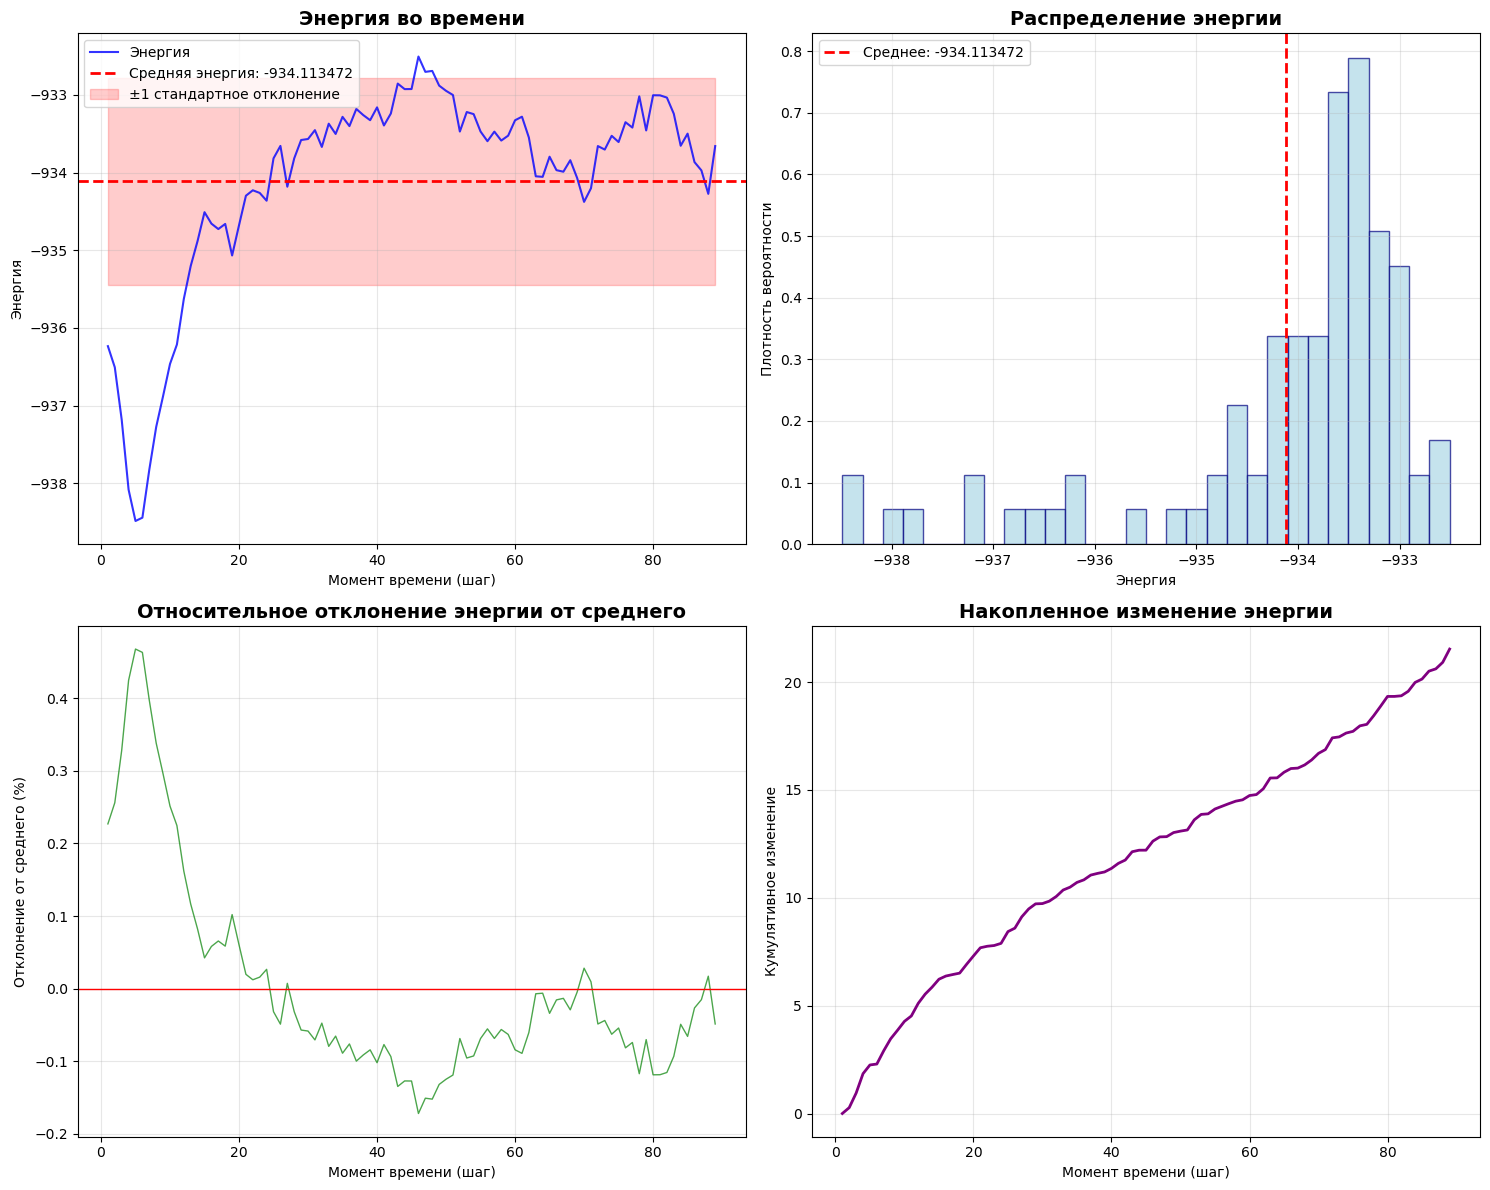


АНАЛИЗ СОХРАНЕНИЯ ЭНЕРГИИ: C:\NormanProject\Molecular_Dynamics_project\energy.txt
Общее количество измерений: 89
Временной диапазон: 89 шагов
Средняя энергия: -934.1134719101
Стандартное отклонение: 1.3358493161
Минимальная энергия: -938.4840000000
Максимальная энергия: -932.5070000000
Размах энергии: 5.9770000000
Относительная флуктуация (σ/μ): -0.00143007 (-0.143007%)
Максимальное относительное отклонение: 0.467880%

КРИТЕРИИ СОХРАНЕНИЯ ЭНЕРГИИ:
1. Относительная флуктуация: ОТЛИЧНОЕ сохранение
   (флуктуация = -0.1430%)
2. Стабильность энергии: УМЕРЕННО СТАБИЛЬНАЯ
   (σ/размах = 0.2235)
3. Общий дрейф энергии: 2.57500000 (-0.2757%)
   Дрейф: НЕЗНАЧИТЕЛЬНЫЙ

АНАЛИЗ СТАЦИОНАРНОСТИ:
Среднее изменение за шаг: 0.0292613636
Стандартное отклонение изменений: 0.3057243818
✓ Энергия демонстрирует свойства стационарного процесса

АНАЛИЗ АВТОКОРРЕЛЯЦИИ:
Автокорреляция с лагом 1: 0.959062
⚠ Заметная корреляция между последовательными значениями
Экспортировать результаты анализа? (y/n): y
Резуль

In [2]:


def analyze_energy_conservation(filename):
    """
    Анализирует сохранение энергии во времени
    """
    # Проверка существования файла
    if not os.path.exists(filename):
        print(f"Ошибка: Файл '{filename}' не найден.")
        return
    
    # Чтение данных энергии
    energy = []
    time_points = []
    with open(filename, 'r', encoding='utf-8') as file:
        for line_num, line in enumerate(file, 1):
            line = line.strip()
            if line:
                try:
                    energy_value = float(line)
                    energy.append(energy_value)
                    time_points.append(line_num)  # Номер строки как момент времени
                except ValueError:
                    print(f"Предупреждение: Строка {line_num} содержит некорректные данные: '{line}'")
    
    if not energy:
        print("Ошибка: Не найдено корректных числовых данных.")
        return
    
    energy = np.array(energy)
    time_points = np.array(time_points)
    
    # Основная статистика энергии
    mean_energy = np.mean(energy)
    std_energy = np.std(energy)
    min_energy = np.min(energy)
    max_energy = np.max(energy)
    energy_range = max_energy - min_energy
    
    # Анализ сохранения энергии
    energy_change = np.abs(energy - mean_energy)
    relative_fluctuation = std_energy / mean_energy if mean_energy != 0 else 0
    
    # Создание комплексного графика
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
    
    # 1. График энергии во времени
    ax1.plot(time_points, energy, 'b-', linewidth=1.5, alpha=0.8, label='Энергия')
    ax1.axhline(mean_energy, color='red', linestyle='--', linewidth=2, 
               label=f'Средняя энергия: {mean_energy:.6f}')
    ax1.fill_between(time_points, mean_energy - std_energy, mean_energy + std_energy, 
                    alpha=0.2, color='red', label='±1 стандартное отклонение')
    ax1.set_xlabel('Момент времени (шаг)')
    ax1.set_ylabel('Энергия')
    ax1.set_title('Энергия во времени', fontsize=14, fontweight='bold')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # 2. Гистограмма распределения энергии
    n, bins, patches = ax2.hist(energy, bins=30, density=True, alpha=0.7, 
                               color='lightblue', edgecolor='navy')
    ax2.axvline(mean_energy, color='red', linestyle='--', linewidth=2,
               label=f'Среднее: {mean_energy:.6f}')
    ax2.set_xlabel('Энергия')
    ax2.set_ylabel('Плотность вероятности')
    ax2.set_title('Распределение энергии', fontsize=14, fontweight='bold')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    # 3. Отклонение от средней энергии
    deviation = energy - mean_energy
    relative_deviation = (deviation / mean_energy * 100) if mean_energy != 0 else deviation
    
    ax3.plot(time_points, relative_deviation, 'g-', linewidth=1, alpha=0.7)
    ax3.axhline(0, color='red', linestyle='-', linewidth=1)
    ax3.set_xlabel('Момент времени (шаг)')
    ax3.set_ylabel('Отклонение от среднего (%)' if mean_energy != 0 else 'Отклонение от среднего')
    ax3.set_title('Относительное отклонение энергии от среднего', fontsize=14, fontweight='bold')
    ax3.grid(True, alpha=0.3)
    
    # 4. Кумулятивное изменение энергии
    cumulative_change = np.cumsum(np.abs(np.diff(energy, prepend=energy[0])))
    ax4.plot(time_points, cumulative_change, 'purple', linewidth=2)
    ax4.set_xlabel('Момент времени (шаг)')
    ax4.set_ylabel('Кумулятивное изменение')
    ax4.set_title('Накопленное изменение энергии', fontsize=14, fontweight='bold')
    ax4.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Детальный статистический анализ
    print("\n" + "="*80)
    print(f"АНАЛИЗ СОХРАНЕНИЯ ЭНЕРГИИ: {filename}")
    print("="*80)
    print(f"Общее количество измерений: {len(energy):,}")
    print(f"Временной диапазон: {len(energy)} шагов")
    print(f"Средняя энергия: {mean_energy:.10f}")
    print(f"Стандартное отклонение: {std_energy:.10f}")
    print(f"Минимальная энергия: {min_energy:.10f}")
    print(f"Максимальная энергия: {max_energy:.10f}")
    print(f"Размах энергии: {energy_range:.10f}")
    
    if mean_energy != 0:
        print(f"Относительная флуктуация (σ/μ): {relative_fluctuation:.8f} ({relative_fluctuation*100:.6f}%)")
        print(f"Максимальное относительное отклонение: {np.max(np.abs(relative_deviation)):.6f}%")
    
    # Критерии сохранения энергии
    print(f"\nКРИТЕРИИ СОХРАНЕНИЯ ЭНЕРГИИ:")
    
    # Критерий 1: Относительная флуктуация
    if mean_energy != 0:
        if relative_fluctuation < 0.01:  # 1%
            conservation_level = "ОТЛИЧНОЕ"
        elif relative_fluctuation < 0.05:  # 5%
            conservation_level = "ХОРОШЕЕ"
        elif relative_fluctuation < 0.1:  # 10%
            conservation_level = "УДОВЛЕТВОРИТЕЛЬНОЕ"
        else:
            conservation_level = "ПЛОХОЕ"
        
        print(f"1. Относительная флуктуация: {conservation_level} сохранение")
        print(f"   (флуктуация = {relative_fluctuation*100:.4f}%)")
    
    # Критерий 2: Стандартное отклонение
    if energy_range > 0:
        std_ratio = std_energy / energy_range
        if std_ratio < 0.1:
            std_level = "ОЧЕНЬ СТАБИЛЬНАЯ"
        elif std_ratio < 0.2:
            std_level = "СТАБИЛЬНАЯ"
        elif std_ratio < 0.3:
            std_level = "УМЕРЕННО СТАБИЛЬНАЯ"
        else:
            std_level = "НЕСТАБИЛЬНАЯ"
        
        print(f"2. Стабильность энергии: {std_level}")
        print(f"   (σ/размах = {std_ratio:.4f})")
    
    # Критерий 3: Дрейф энергии
    energy_drift = energy[-1] - energy[0]
    if mean_energy != 0:
        relative_drift = (energy_drift / mean_energy) * 100
        print(f"3. Общий дрейф энергии: {energy_drift:.8f} ({relative_drift:.4f}%)")
        
        if abs(relative_drift) < 1:
            drift_level = "НЕЗНАЧИТЕЛЬНЫЙ"
        elif abs(relative_drift) < 5:
            drift_level = "МАЛЫЙ"
        elif abs(relative_drift) < 10:
            drift_level = "ЗАМЕТНЫЙ"
        else:
            drift_level = "ЗНАЧИТЕЛЬНЫЙ"
        
        print(f"   Дрейф: {drift_level}")
    
    # Тест на стационарность (тест Дики-Фуллера упрощенный)
    energy_diff = np.diff(energy)
    mean_diff = np.mean(energy_diff)
    std_diff = np.std(energy_diff)
    
    print(f"\nАНАЛИЗ СТАЦИОНАРНОСТИ:")
    print(f"Среднее изменение за шаг: {mean_diff:.10f}")
    print(f"Стандартное отклонение изменений: {std_diff:.10f}")
    
    if abs(mean_diff) < std_diff * 0.1:
        print("✓ Энергия демонстрирует свойства стационарного процесса")
    else:
        print("⚠ Энергия имеет заметный систематический дрейф")
    
    # Автокорреляция для проверки зависимости
    if len(energy) > 10:
        autocorr = np.correlate(energy - mean_energy, energy - mean_energy, mode='full')
        autocorr = autocorr[len(autocorr)//2:] / autocorr[len(autocorr)//2]
        lag1_autocorr = autocorr[1] if len(autocorr) > 1 else 0
        
        print(f"\nАНАЛИЗ АВТОКОРРЕЛЯЦИИ:")
        print(f"Автокорреляция с лагом 1: {lag1_autocorr:.6f}")
        
        if abs(lag1_autocorr) < 0.1:
            print("✓ Последовательные значения энергии практически независимы")
        elif abs(lag1_autocorr) < 0.3:
            print("~ Слабая корреляция между последовательными значениями")
        else:
            print("⚠ Заметная корреляция между последовательными значениями")

# Функция для экспорта результатов
def export_energy_analysis(filename, output_filename=None):
    """Экспортирует анализ энергии в файл"""
    if output_filename is None:
        output_filename = f"energy_analysis_{os.path.basename(filename)}.txt"
    
    # Чтение данных (аналогично предыдущей функции)
    energy = []
    with open(filename, 'r', encoding='utf-8') as file:
        for line in file:
            line = line.strip()
            if line:
                try:
                    energy.append(float(line))
                except ValueError:
                    continue
    
    if not energy:
        return
    
    energy = np.array(energy)
    mean_energy = np.mean(energy)
    
    # Запись результатов в файл
    with open(output_filename, 'w', encoding='utf-8') as f:
        f.write(f"АНАЛИЗ СОХРАНЕНИЯ ЭНЕРГИИ\n")
        f.write(f"Файл: {filename}\n")
        f.write(f"Дата анализа: {np.datetime64('now')}\n")
        f.write("="*50 + "\n")
        f.write(f"Количество измерений: {len(energy)}\n")
        f.write(f"Средняя энергия: {mean_energy:.12f}\n")
        f.write(f"Стандартное отклонение: {np.std(energy):.12f}\n")
        f.write(f"Относительная флуктуация: {(np.std(energy)/mean_energy*100 if mean_energy != 0 else 0):.8f}%\n")
        f.write(f"Общий дрейф: {(energy[-1] - energy[0]):.12f}\n")
    
    print(f"Результаты экспортированы в: {output_filename}")

# Основная программа
if __name__ == "__main__":
    print("АНАЛИЗАТОР СОХРАНЕНИЯ ЭНЕРГИИ")
    print("=" * 40)
    
    filename = "C:\\NormanProject\\Molecular_Dynamics_project\\energy.txt"
    
    if os.path.exists(filename):
        analyze_energy_conservation(filename)
        
        # Экспорт результатов
        export_choice = input("Экспортировать результаты анализа? (y/n): ").lower()
        if export_choice == 'y':
            export_energy_analysis(filename)
    else:
        print(f"Файл '{filename}' не найден.")

АНАЛИЗАТОР РАСПРЕДЕЛЕНИЯ МАКСВЕЛЛА ДЛЯ СКОРОСТЕЙ


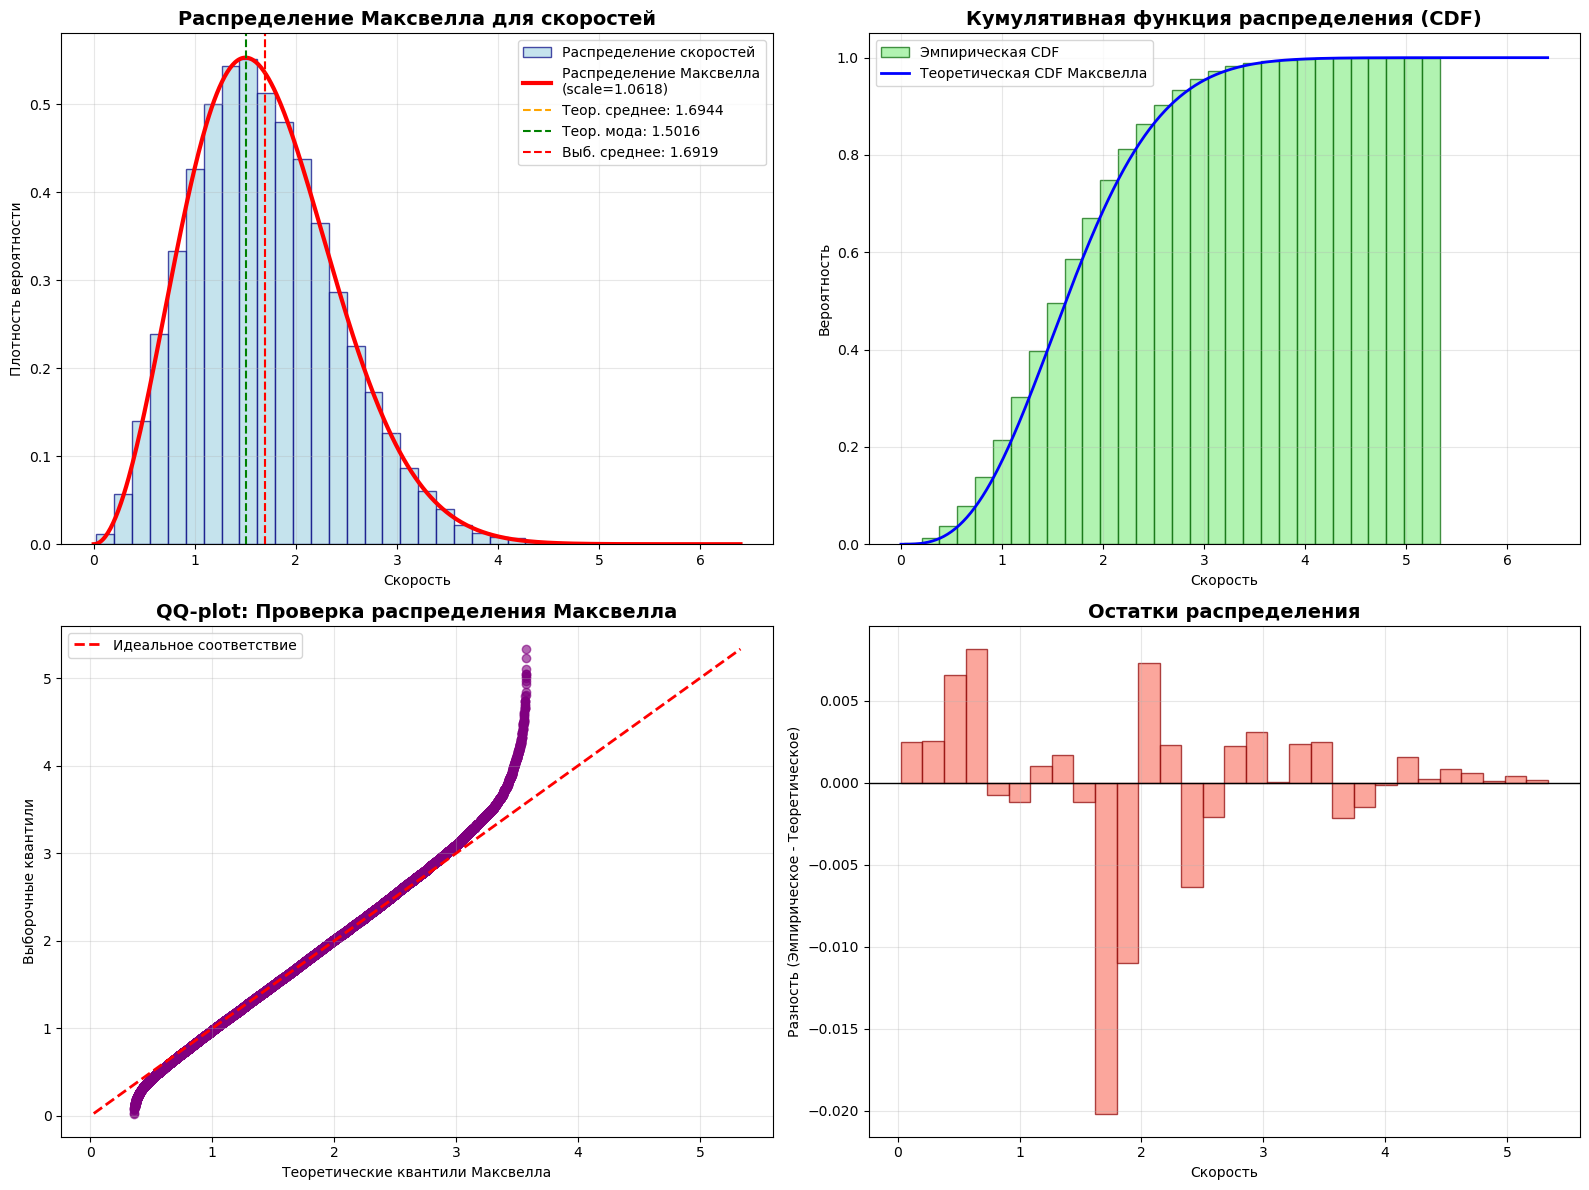


АНАЛИЗ РАСПРЕДЕЛЕНИЯ МАКСВЕЛЛА: C:\NormanProject\Molecular_Dynamics_project\velocity_module.txt
Общее количество скоростей: 45,568
Диапазон скоростей: [0.026896, 5.332430]

ВЫБОРОЧНЫЕ ХАРАКТЕРИСТИКИ:
Средняя скорость: 1.69192668
Медианная скорость: 1.62657000
Стандартное отклонение: 0.72085008
Дисперсия: 0.51962484
Коэффициент вариации: 42.6053%

ТЕОРЕТИЧЕСКИЕ ПАРАМЕТРЫ МАКСВЕЛЛА:
Scale параметр: 1.06179733
Теоретическое среднее: 1.69438339
Теоретическая мода: 1.50160819
Теоретическое стд. отклонение: 0.71505638

СРАВНЕНИЕ С ТЕОРЕТИЧЕСКИМИ ЗНАЧЕНИЯМИ:
Отличие среднего: 0.00245672 (0.1450%)

СТАТИСТИЧЕСКИЕ ТЕСТЫ:
Тест Колмогорова-Смирнова: D = 0.005262, p = 0.159783
Коэффициент детерминации R²: 0.999316

АНАЛИЗ МОМЕНТОВ:
Выборочная асимметрия: 0.504837
Теоретическая асимметрия: -0.485693
Выборочный эксцесс: 0.172855
Теоретический эксцесс: 0.108164

ОЦЕНКА СООТВЕТСТВИЯ РАСПРЕДЕЛЕНИЮ МАКСВЕЛЛА:
✓ Тест Колмогорова-Смирнова: распределение не противоречит Максвеллу (p > 0.05)
✓ Отличное виз

In [4]:


def maxwell_pdf(x, a, scale):
    """Функция плотности распределения Максвелла"""
    return stats.maxwell.pdf(x, a, scale)

def analyze_maxwell_distribution(filename, bins=30):
    """
    Анализирует, подчиняются ли скорости распределению Максвелла
    """
    # Проверка существования файла
    if not os.path.exists(filename):
        print(f"Ошибка: Файл '{filename}' не найден.")
        return None
    
    # Чтение данных скоростей
    speeds = []
    with open(filename, 'r', encoding='utf-8') as file:
        for line_num, line in enumerate(file, 1):
            line = line.strip()
            if line:
                try:
                    speed_value = float(line)
                    if speed_value >= 0:  # Скорости должны быть неотрицательными
                        speeds.append(speed_value)
                    else:
                        print(f"Предупреждение: Строка {line_num} содержит отрицательную скорость: {speed_value}")
                except ValueError:
                    print(f"Предупреждение: Строка {line_num} содержит некорректные данные: '{line}'")
    
    if not speeds:
        print("Ошибка: Не найдено корректных числовых данных.")
        return None
    
    speeds = np.array(speeds)
    
    # Основная статистика скоростей
    mean_speed = np.mean(speeds)
    std_speed = np.std(speeds)
    var_speed = np.var(speeds)
    median_speed = np.median(speeds)
    
    # Теоретические параметры для распределения Максвелла
    # Для распределения Максвелла:
    # scale = σ * √2, где σ - стандартное отклонение нормальных компонент
    # В нашем случае мы оцениваем scale из данных
    
    # Метод 1: Через моменты распределения
    maxwell_scale_estimated = np.sqrt(2 * var_speed / (3 * np.pi - 8))
    
    # Метод 2: Maximum Likelihood Estimation
    maxwell_scale_mle = np.sqrt(np.mean(speeds**2) / 3)
    
    # Метод 3: Подгонка кривой
    try:
        hist, bin_edges = np.histogram(speeds, bins=bins, density=True)
        bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
        
        # Игнорируем пустые бины для подгонки
        valid_indices = hist > 0
        if np.sum(valid_indices) > 5:  # Нужно достаточно точек для подгонки
            popt, pcov = curve_fit(maxwell_pdf, bin_centers[valid_indices], 
                                 hist[valid_indices], p0=[0, maxwell_scale_mle])
            maxwell_scale_fitted = popt[1]
            fit_success = True
        else:
            maxwell_scale_fitted = maxwell_scale_mle
            fit_success = False
    except:
        maxwell_scale_fitted = maxwell_scale_mle
        fit_success = False
    
    # Используем MLE оценку как основную (она наиболее надежна)
    maxwell_scale = maxwell_scale_mle
    
    # Теоретические значения для распределения Максвелла
    theoretical_mean = 2 * maxwell_scale * np.sqrt(2 / np.pi)
    theoretical_std = maxwell_scale * np.sqrt(3 * np.pi - 8) / np.sqrt(np.pi)
    theoretical_mode = maxwell_scale * np.sqrt(2)
    
    # Создание комплексного графика
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
    
    # 1. Гистограмма с распределением Максвелла
    n, bins, patches = ax1.hist(speeds, bins=bins, density=True, alpha=0.7, 
                               color='lightblue', edgecolor='navy', 
                               label='Распределение скоростей')
    
    # Распределение Максвелла
    x_smooth = np.linspace(0, max(speeds) * 1.2, 500)
    maxwell_curve = stats.maxwell.pdf(x_smooth, 0, maxwell_scale)
    
    ax1.plot(x_smooth, maxwell_curve, 'r-', linewidth=3, 
            label=f'Распределение Максвелла\n(scale={maxwell_scale:.4f})')
    
    # Вертикальные линии для характерных скоростей
    ax1.axvline(theoretical_mean, color='orange', linestyle='--', 
               label=f'Теор. среднее: {theoretical_mean:.4f}')
    ax1.axvline(theoretical_mode, color='green', linestyle='--', 
               label=f'Теор. мода: {theoretical_mode:.4f}')
    ax1.axvline(mean_speed, color='red', linestyle='--', 
               label=f'Выб. среднее: {mean_speed:.4f}')
    
    ax1.set_xlabel('Скорость')
    ax1.set_ylabel('Плотность вероятности')
    ax1.set_title('Распределение Максвелла для скоростей', fontsize=14, fontweight='bold')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # 2. Сравнение эмпирического и теоретического распределений (CDF)
    ax2.hist(speeds, bins=bins, density=True, cumulative=True, 
            alpha=0.7, color='lightgreen', edgecolor='darkgreen',
            label='Эмпирическая CDF')
    
    maxwell_cdf = stats.maxwell.cdf(x_smooth, 0, maxwell_scale)
    ax2.plot(x_smooth, maxwell_cdf, 'b-', linewidth=2, 
            label='Теоретическая CDF Максвелла')
    
    ax2.set_xlabel('Скорость')
    ax2.set_ylabel('Вероятность')
    ax2.set_title('Кумулятивная функция распределения (CDF)', fontsize=14, fontweight='bold')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    # 3. QQ-plot для распределения Максвелла
    theoretical_quantiles = stats.maxwell.ppf(np.linspace(0.01, 0.99, len(speeds)), 0, maxwell_scale)
    sorted_speeds = np.sort(speeds)
    
    ax3.scatter(theoretical_quantiles, sorted_speeds, alpha=0.6, color='purple')
    
    # Линия идеального соответствия
    min_val = min(theoretical_quantiles.min(), sorted_speeds.min())
    max_val = max(theoretical_quantiles.max(), sorted_speeds.max())
    ax3.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, 
            label='Идеальное соответствие')
    
    ax3.set_xlabel('Теоретические квантили Максвелла')
    ax3.set_ylabel('Выборочные квантили')
    ax3.set_title('QQ-plot: Проверка распределения Максвелла', fontsize=14, fontweight='bold')
    ax3.legend()
    ax3.grid(True, alpha=0.3)
    
    # 4. Остатки (разность между эмпирическим и теоретическим распределением)
    hist, bin_edges = np.histogram(speeds, bins=bins, density=True)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    theoretical_hist = stats.maxwell.pdf(bin_centers, 0, maxwell_scale)
    
    residuals = hist - theoretical_hist
    ax4.bar(bin_centers, residuals, width=bin_edges[1]-bin_edges[0], 
           alpha=0.7, color='salmon', edgecolor='darkred')
    ax4.axhline(0, color='black', linestyle='-', linewidth=1)
    ax4.set_xlabel('Скорость')
    ax4.set_ylabel('Разность (Эмпирическое - Теоретическое)')
    ax4.set_title('Остатки распределения', fontsize=14, fontweight='bold')
    ax4.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Статистический анализ соответствия
    print("\n" + "="*80)
    print(f"АНАЛИЗ РАСПРЕДЕЛЕНИЯ МАКСВЕЛЛА: {filename}")
    print("="*80)
    print(f"Общее количество скоростей: {len(speeds):,}")
    print(f"Диапазон скоростей: [{min(speeds):.6f}, {max(speeds):.6f}]")
    
    print(f"\nВЫБОРОЧНЫЕ ХАРАКТЕРИСТИКИ:")
    print(f"Средняя скорость: {mean_speed:.8f}")
    print(f"Медианная скорость: {median_speed:.8f}")
    print(f"Стандартное отклонение: {std_speed:.8f}")
    print(f"Дисперсия: {var_speed:.8f}")
    print(f"Коэффициент вариации: {(std_speed/mean_speed*100):.4f}%")
    
    print(f"\nТЕОРЕТИЧЕСКИЕ ПАРАМЕТРЫ МАКСВЕЛЛА:")
    print(f"Scale параметр: {maxwell_scale:.8f}")
    print(f"Теоретическое среднее: {theoretical_mean:.8f}")
    print(f"Теоретическая мода: {theoretical_mode:.8f}")
    print(f"Теоретическое стд. отклонение: {theoretical_std:.8f}")
    
    print(f"\nСРАВНЕНИЕ С ТЕОРЕТИЧЕСКИМИ ЗНАЧЕНИЯМИ:")
    mean_diff = abs(mean_speed - theoretical_mean)
    mean_diff_percent = (mean_diff / theoretical_mean * 100) if theoretical_mean != 0 else 0
    print(f"Отличие среднего: {mean_diff:.8f} ({mean_diff_percent:.4f}%)")
    
    # Тесты на соответствие распределению Максвелла
    print(f"\nСТАТИСТИЧЕСКИЕ ТЕСТЫ:")
    
    # Тест Колмогорова-Смирнова
    ks_stat, ks_p = stats.kstest(speeds, 'maxwell', args=(0, maxwell_scale))
    print(f"Тест Колмогорова-Смирнова: D = {ks_stat:.6f}, p = {ks_p:.6f}")
    
    # Расчет R² (коэффициент детерминации)
    ss_res = np.sum((hist - theoretical_hist) ** 2)
    ss_tot = np.sum((hist - np.mean(hist)) ** 2)
    r_squared = 1 - (ss_res / ss_tot) if ss_tot != 0 else 0
    print(f"Коэффициент детерминации R²: {r_squared:.6f}")
    
    # Анализ моментов распределения
    skewness = stats.skew(speeds)
    kurtosis = stats.kurtosis(speeds)
    theoretical_skewness = (2 * np.sqrt(2) * (5 * np.pi - 16)) / ((3 * np.pi - 8) ** 1.5)
    theoretical_kurtosis = (-4 * (96 - 40 * np.pi + 3 * np.pi ** 2)) / ((3 * np.pi - 8) ** 2)
    
    print(f"\nАНАЛИЗ МОМЕНТОВ:")
    print(f"Выборочная асимметрия: {skewness:.6f}")
    print(f"Теоретическая асимметрия: {theoretical_skewness:.6f}")
    print(f"Выборочный эксцесс: {kurtosis:.6f}")
    print(f"Теоретический эксцесс: {theoretical_kurtosis:.6f}")
    
    # Оценка качества соответствия
    print(f"\nОЦЕНКА СООТВЕТСТВИЯ РАСПРЕДЕЛЕНИЮ МАКСВЕЛЛА:")
    
    conformity_score = 0
    
    if ks_p > 0.05:
        print("✓ Тест Колмогорова-Смирнова: распределение не противоречит Максвеллу (p > 0.05)")
        conformity_score += 1
    else:
        print("✗ Тест Колмогорова-Смирнова: распределение значимо отличается от Максвелла")
    
    if r_squared > 0.95:
        print("✓ Отличное визуальное соответствие (R² > 0.95)")
        conformity_score += 1
    elif r_squared > 0.90:
        print("~ Хорошее визуальное соответствие (R² > 0.90)")
        conformity_score += 1
    elif r_squared > 0.80:
        print("~ Удовлетворительное визуальное соответствие (R² > 0.80)")
    else:
        print("✗ Слабое визуальное соответствие (R² ≤ 0.80)")
    
    if abs(skewness - theoretical_skewness) < 0.5:
        print("✓ Асимметрия близка к теоретической")
        conformity_score += 1
    else:
        print("✗ Асимметрия значительно отличается от теоретической")
    
    if mean_diff_percent < 5:
        print("✓ Средняя скорость близка к теоретической")
        conformity_score += 1
    else:
        print("✗ Средняя скорость значительно отличается от теоретической")
    
    print(f"\nИТОГОВАЯ ОЦЕНКА: {conformity_score}/4")
    if conformity_score >= 3:
        print("🎉 ВЫСОКАЯ СТЕПЕНЬ СООТВЕТСТВИЯ РАСПРЕДЕЛЕНИЮ МАКСВЕЛЛА")
    elif conformity_score >= 2:
        print("✅ УМЕРЕННАЯ СТЕПЕНЬ СООТВЕТСТВИЯ")
    else:
        print("⚠ НИЗКАЯ СТЕПЕНЬ СООТВЕТСТВИЯ")
    
    return speeds, maxwell_scale

# Функция для анализа компонент скорости (если доступны)
def analyze_velocity_components(filename_x, filename_y, filename_z):
    """Анализирует распределение компонент скорости (должны быть нормальными)"""
    # Реализация для анализа трех компонент скорости
    pass

# Основная программа
if __name__ == "__main__":
    print("АНАЛИЗАТОР РАСПРЕДЕЛЕНИЯ МАКСВЕЛЛА ДЛЯ СКОРОСТЕЙ")
    print("=" * 50)
    
    filename = "C:\\NormanProject\\Molecular_Dynamics_project\\velocity_module.txt"
    
    if os.path.exists(filename):
        results = analyze_maxwell_distribution(filename)
        
        if results is not None:
            speeds, maxwell_scale = results
            
            # Дополнительный анализ
            additional = input("\nПоказать дополнительную статистику? (y/n): ").lower()
            if additional == 'y':
                print(f"\nДОПОЛНИТЕЛЬНАЯ СТАТИСТИКА:")
                print(f"95% перцентиль: {np.percentile(speeds, 95):.6f}")
                print(f"99% перцентиль: {np.percentile(speeds, 99):.6f}")
                print(f"Доля скоростей > 2σ: {(np.sum(speeds > 2*maxwell_scale) / len(speeds) * 100):.2f}%")
                print(f"Доля скоростей > 3σ: {(np.sum(speeds > 3*maxwell_scale) / len(speeds) * 100):.2f}%")
    else:
        print(f"Файл '{filename}' не найден.")